## 1. Data Pre-processing (15 Marks)
Read data and separate into test, train, and validation sets.
Implement necessary pre-processing steps, addressing missing data and outliers.
you can use shared notebook but make sure to change it if needed (data has some changes).

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [82]:
df = pd.read_csv('data/yield_prediction.csv', index_col=False)
df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,0,0.072,80.179,9.414,0,29.878,2.231,6,c
1,1,5.413,58.359,9.681,3,53.416,1.810,6,c
2,2,9.731,78.506,7.189,1,63.391,2.455,1,d
3,3,10.995,69.248,1.738,3,17.984,0.603,2,a
4,4,2.617,87.658,9.706,1,49.768,2.910,6,c


In [83]:
print(f"Missing values: \n{df.isnull().sum()}")
print(f"Number of rows: {df.shape[0]}")

Missing values: 
id                   0
water               42
uv                   0
area                 0
fertilizer_usage     0
yield                0
pesticides           0
region               0
categories           0
dtype: int64
Number of rows: 1000


In [84]:
df.describe()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,958.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,6.668327,78.701995,8.098848,2.294000,58.758571,3.452301,3.039000
std,288.819436,2.842990,245.848978,2.692632,1.554986,24.563683,2.076921,1.883886
min,0.000000,0.072000,-2500.000000,0.263000,0.000000,2.843000,0.014000,0.000000
25%,249.750000,4.584750,66.493000,6.297000,1.000000,40.698000,1.804500,2.000000
50%,499.500000,6.476000,73.700000,7.987500,3.000000,55.602500,3.275500,2.000000
75%,749.250000,8.758750,80.608250,9.900250,3.000000,73.645500,4.916000,5.000000
max,999.000000,18.100000,7400.620000,18.311000,5.000000,148.845000,9.532000,6.000000


In [85]:
fig = px.histogram(df, x="uv", title="UV Histogram")
fig2 = px.box(df, x="uv", title="UV Boxplot")
fig.show()
fig2.show()

In [86]:
fig = px.histogram(df, x="water", title="Water Histogram")
fig2 = px.box(df, x="water", title="Water Boxplot")
fig.show()
fig2.show()

In [87]:
fig = px.histogram(df, x="area", title="Area Histogram")
fig2 = px.box(df, x="area", title="Area Boxplot")
fig.show()
fig2.show()

In [88]:
fig = px.histogram(df, x="fertilizer_usage", title="Fertilizer Usage Histogram")
fig2 = px.box(df, x="fertilizer_usage", title="Fertilizer Usage Boxplot")
fig.show()
fig2.show()

In [89]:
fig = px.histogram(df, x="pesticides", title="Pesticides Histogram")
fig2 = px.box(df, x="pesticides", title="Pesticides Boxplot")
fig.show()
fig2.show()

In [90]:
fig = px.histogram(df, x="region", title="Region Histogram")
fig2 = px.box(df, x="region", title="Region Boxplot")
fig.show()
fig2.show()

##### After looking at the histograms and box plots of all numerical columns of the dataset. It was visually determined that the only column that have outliers is the "uv" column. Based on this observation. we defined outliers as follows: $$Outlier \ge C\sigma+M \text{ or } Outlier \le M - C\sigma$$ Where $C = 5$ and $\sigma$ is the standard deviation and $M$ is median.

In [91]:
# Replace NaN values Medians for a list of columns
def replace_nan_median(df, columns):
    for column in columns:
        median = df[column].median()
        df[column].fillna(median, inplace=True)

replace_nan_median(df, ["uv", "water", "area", "fertilizer_usage", "pesticides"])
print(f"Missing values: \n{df.isnull().sum()}")

Missing values: 
id                  0
water               0
uv                  0
area                0
fertilizer_usage    0
yield               0
pesticides          0
region              0
categories          0
dtype: int64


In [92]:
C = 5
#Replace outliers with the median of a list of columns
def replace_outliers_median(df, columns):
    for column in columns:
        median = df[column].median()
        std = df[column].std()
        outliers = (df[column] > median + C * std) | (df[column] < median - C * std)
        df.loc[outliers, column] = median

replace_outliers_median(df, ["uv", "water", "area", "fertilizer_usage", "pesticides"])
df.describe()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,6.660249,73.948775,8.098848,2.294000,58.758571,3.452301,3.039000
std,288.819436,2.782853,9.932102,2.692632,1.554986,24.563683,2.076921,1.883886
min,0.000000,0.072000,45.264000,0.263000,0.000000,2.843000,0.014000,0.000000
25%,249.750000,4.695500,66.501250,6.297000,1.000000,40.698000,1.804500,2.000000
50%,499.500000,6.476000,73.700000,7.987500,3.000000,55.602500,3.275500,2.000000
75%,749.250000,8.611000,80.566250,9.900250,3.000000,73.645500,4.916000,5.000000
max,999.000000,18.100000,106.310000,18.311000,5.000000,148.845000,9.532000,6.000000


In [93]:
fig = px.histogram(df, x="uv", title="Adjusted UV Histogram")
fig2 = px.box(df, x="uv", title="Adjusted UV Boxplot")
fig.show()
fig2.show()

In [94]:
def create_category_one_hot(row: pd.Series):
    categories = row['categories'].split(',')
    for category in categories:
        col_name = f"category_{category}"
        row[col_name] = 1
    return row

column_types = {
    'category_a': 'int',
    'category_c': 'int',
    'category_d': 'int',
}

df = df.apply(create_category_one_hot, axis=1)
df = df.fillna(0)
df.drop(columns=['categories'], inplace=True)
df = df.astype(column_types)

# Rearranging columns to have the target variable at the end
df = df[['uv', 'water', 'area', 'fertilizer_usage', 'pesticides', 'category_a', 'category_c', 'category_d', 'yield']]
df.head(n=5)

,uv,water,area,fertilizer_usage,pesticides,category_a,category_c,category_d,yield
0,80.179,0.072,9.414,0,2.231,0,1,0,29.878
1,58.359,5.413,9.681,3,1.810,0,1,0,53.416
2,78.506,9.731,7.189,1,2.455,0,0,1,63.391
3,69.248,10.995,1.738,3,0.603,1,0,0,17.984
4,87.658,2.617,9.706,1,2.910,0,1,0,49.768


In [95]:
X = df.drop('yield', axis=1)
y = df['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(n=5)
#Create a function that takes a dataframe and a list of columns and returns a new dataframe with the columns scaled using z-score normalization
def z_score_normalization(df, columns):
    for column in columns:
        mean = X_train[column].mean()
        std = X_train[column].std()
        df[column] = (df[column] - mean) / std

z_score_normalization(X_test, ["uv", "water", "area", "fertilizer_usage", "pesticides"])
z_score_normalization(X_train, ["uv", "water", "area", "fertilizer_usage", "pesticides"])
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
# X_train.head(n=5)

## 2. Regression Tree Optimization (30 Marks)
Apply regression tree and tune parameters to prevent overfitting.
Implement post-pruning without Python libraries and compare it with results with pre-pruning and SKlearn post-pruning.
Discuss the effectiveness of each method in this dataset.

In [86]:
# Import libraries  

import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from copy import deepcopy

# Pruning can be done by removing nodes that are of high impurity (have little information gain to help divide the data)
# Impurity of a regression tree refers to the presence of datapoints at the leaf nodes that to not satisfy their decision node parent
# In a general classification tree, it refers to the presence of mixed classes at the leaf nodes rather than just one class
# Higher impurity values indicate a less homogenous leaf in terms of values or classes

# Define a function to prune a tree based on the impurity
# The function takes in an alpha value representing a threshold on the maximum impurity desired and the tree class of the fully-grown and trained regression tree

def prune_tree(alpha, tree_class):

    # Get the tree structure from the class

    tree = tree_class.tree_

    # Parallel processing with the tree's numpy array structure can be used to check the impurity at all nodes at the same time
    # 'check_impurities' stores boolean values indicating if the impurity at a node is above the alpha threshold
    # The indicies of these nodes are then extracted and used for pruning
    # This method allows for the function to be more computationally efficient when looking for nodes to prune

    check_impurities = tree.impurity > alpha
    indicies = np.where(check_impurities == True)[0]

    # Prune the nodes at the indicies collected that had impurities higher than the threshold
    # This is done by setting its children to -1

    for index in indicies:
        tree.children_left[index] = -1
        tree.children_right[index] = -1

    # return the tree class with the pruned tree
        
    return tree_class




# Create and fit the regression tree model in a deterministic way (random_state = 0 for splitting) and fit it to the training data

clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train, y_train)

# Evaluate the model train and test MSE

print("Train MSE:", mean_squared_error(y_train, clf.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, clf.predict(X_test)))
print("Original depth:", clf.get_depth())

# Define range of alpha theshold values to use for tree pruning 
# The most exaustive list is composed of stepping through values of the tree's existing impurities from least to greatest

alphas = np.arange(min(clf.tree_.impurity), max(clf.tree_.impurity), 0.1)

# Initialize arrays to store the pruned trees' MSEs and depths

pruning_train_mse = []
pruning_test_mse = []
depths = []

# For all alpha values found to test with, copy the the fully-grown and trained regression tree (to avoid overwriting it) and prune it
# Add the depth, training MSE and testing MSE to the defined arrays

for a in alphas:
    pruned_tree = prune_tree(a, deepcopy(clf))
    depths.append(pruned_tree.get_depth())
    pruning_train_mse.append(mean_squared_error(y_train, pruned_tree.predict(X_train.astype(np.float32))))
    pruning_test_mse.append(mean_squared_error(y_test, pruned_tree.predict(X_test.astype(np.float32))))

# Find the smallest test MSE and its corrusponding train MSE, depth, and alpha value used for pruning
    
print("\nAfter pruning: \nSmallest test MSE:", min(pruning_test_mse))
print("Corrusponding train MSE:", pruning_train_mse[pruning_test_mse.index(min(pruning_test_mse))])
print("Corrusponding alpha used for pruning:", alphas[pruning_test_mse.index(min(pruning_test_mse))])
print("Corrusponding depth:", depths[pruning_test_mse.index(min(pruning_test_mse))])

# Re-prune the fully-grown and trained regression tree by the optimal impurity threshold to use for later

final_pruned_tree = prune_tree(alphas[pruning_test_mse.index(min(pruning_test_mse))], deepcopy(clf))


Train MSE: 0.0
Test MSE: 341.931543125
Original depth: 19

After pruning: 
Smallest test MSE: 330.7952045769531
Corrusponding train MSE: 6.526716124843748
Corrusponding alpha used for pruning: 624.6999999999528
Corrusponding depth: 19


After post-pruning, the pruned tree's test MSE has decreased and the train MSE has increased relative to the fully-grown tree. The depth of the tree has not changed, which may indicate it has a very wide structure. If this is the case, post-pruning based on just impurities will not have a great impact since the fully-grown tree had a training MSE of 0 (ie, the 800 training points were already perfectly fit). 

Testing 'min_samples_leaf' values:
Minimum samples at any leaf node for the lowest MSE: 19
Train MSE: 176.57862084145046
Test MSE: 233.96851428541243 

Testing 'min_samples_split' values:
Minimum samples to split with the lowest MSE: 59
Train MSE: 187.16991968592313
Test MSE: 227.52004373783075 

Testing 'max_depth' values:
Maximum depth with the lowest MSE: 6
Train MSE: 147.61709115458342
Test MSE: 231.7553123777434 

Train MSE with all 3 independantly optimized pre-pruning parameters implemented: 198.09297105883599
Test MSE with all 3 independantly optimized pre-pruning parameters implemented: 228.99585032163296


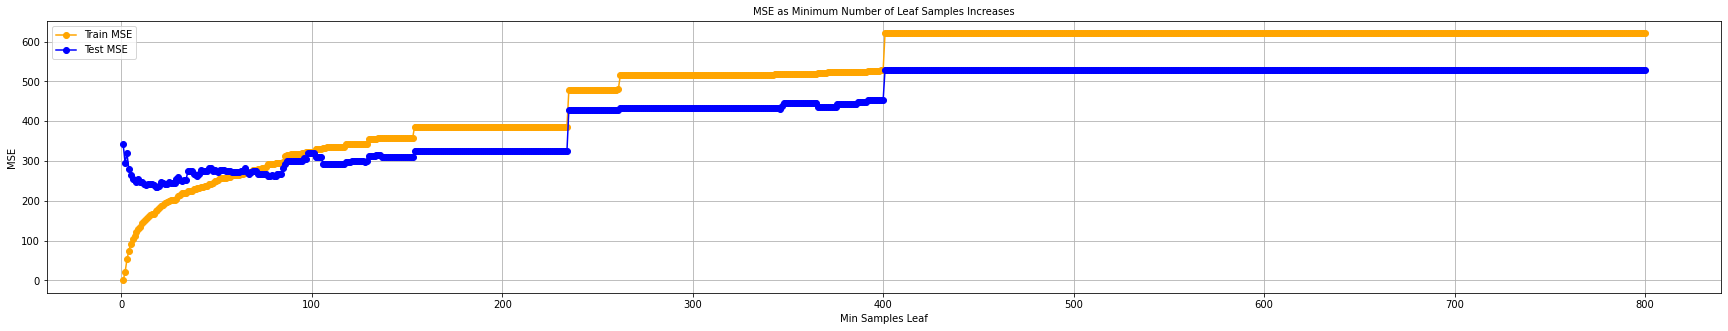

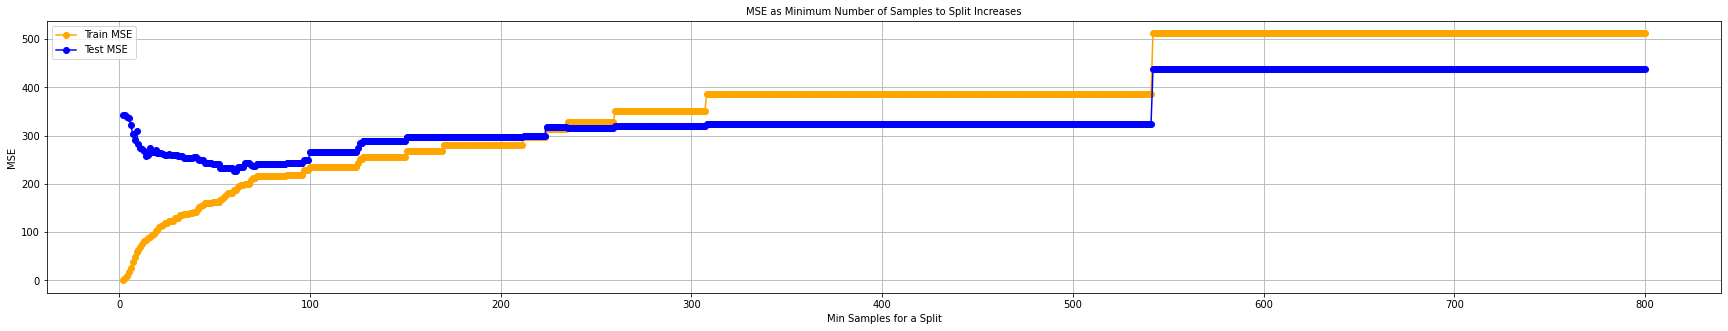

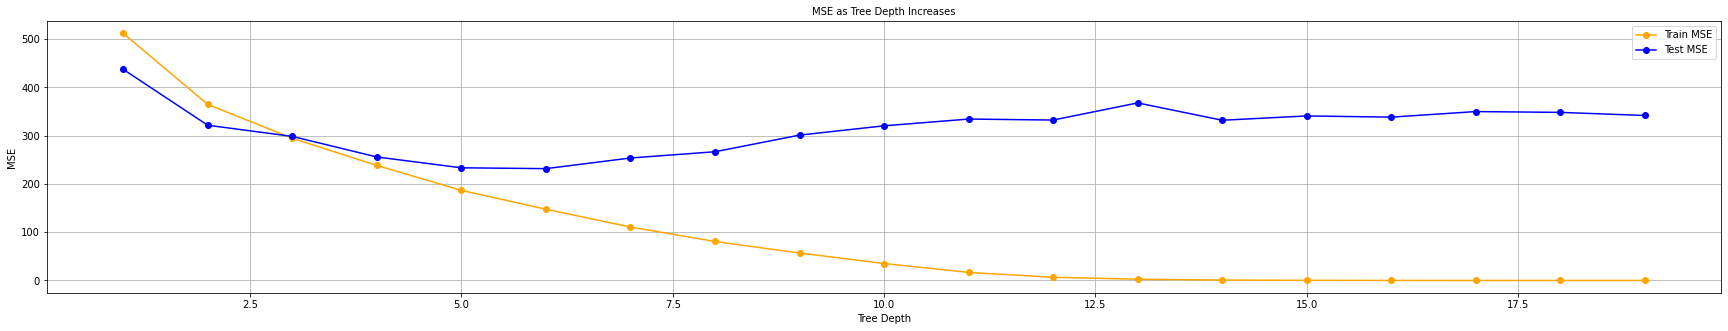

In [89]:
# Apply pre-pruning to prevent overfitting based on available regression tree attributes (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
# We know there are 800 datapoints in the training set that will end up at leaves and 8 features to split the data by - this defines limits for some of the parameters

# Import libraries and methods 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create trees with different minimum numbers of samples required to be at a leaf node from 1 to 800 (all possible values for the given dataset)
# A split point at any depth will only be considered if it leaves at least 'min_samples_leaf' training samples in each of the left and right branches
# This may have the effect of smoothing the model, especially in regression

train_mse_min_samples_leaf = []    # Array to keep track of train MSE for each tree
test_mse_min_samples_leaf = []     # Array to keep track of test MSE for each tree
leaves = np.arange(1, 801)         # values of 'min_samples_leaf' to try (1-800)

for i in range(800):                                                                               

    # Fit the regression tree to the training data and add the train and test MSEs to the tracking arrays

    leaf_regression_tree_model = DecisionTreeRegressor(min_samples_leaf=i+1, random_state = 0)          # Add 1 to 'min_samples_leaf' since the looping index starts at 0
    leaf_regression_tree_model.fit(X_train, y_train)
    train_mse_min_samples_leaf.append(mean_squared_error(y_train, leaf_regression_tree_model.predict(X_train)))
    test_mse_min_samples_leaf.append(mean_squared_error(y_test, leaf_regression_tree_model.predict(X_test)))

# Plot the train and test MSEs for each 'min_samples_leaf' value tested
    
plt.figure(figsize=(30,5))
plt.plot(leaves, train_mse_min_samples_leaf, marker='o', color = "orange", label = "Train MSE")
plt.plot(leaves, test_mse_min_samples_leaf, marker='o', color = "blue", label = "Test MSE")
plt.title("MSE as Minimum Number of Leaf Samples Increases", size = 10) 
plt.xlabel("Min Samples Leaf", size = 10) 
plt.ylabel("MSE", size = 10) 
plt.grid(True)
plt.legend() 

# Print out the 'min_samples_leaf' corrusponding to the min test MSE and its associated train and test MSEs

print("Testing 'min_samples_leaf' values:")
print(f"Minimum samples at any leaf node for the lowest MSE: {test_mse_min_samples_leaf.index(min(test_mse_min_samples_leaf))+1}")
print(f"Train MSE: {train_mse_min_samples_leaf[test_mse_min_samples_leaf.index(min(test_mse_min_samples_leaf))]}")
print(f"Test MSE: {min(test_mse_min_samples_leaf)} \n")




# Create trees with different minimum numbers of samples required split an internal node from 2 to 800 (all possible values for the given dataset)
# As the value for the split decreases, the tree becomes more complex with more decision nodes
# Increasing the minimum samples requried to make a split helps to avoid the creation of nodes with few samples, which could capture noise in the data

train_mse_min_samples_split = []    # Array to keep track of train MSE for each tree
test_mse_min_samples_split = []     # Array to keep track of test MSE for each tree
splits = np.arange(2, 801)          # values of 'min_samples_split' to try (2-800)

for i in range(799):

    # Fit the regression tree to the training data and add the train and test MSEs to the tracking arrays

    split_regression_tree_model = DecisionTreeRegressor(min_samples_split=i+2, random_state = 0)             # Add 2 to 'min_samples_split' since the looping index starts at 0
    split_regression_tree_model.fit(X_train, y_train)
    train_mse_min_samples_split.append(mean_squared_error(y_train, split_regression_tree_model.predict(X_train)))
    test_mse_min_samples_split.append(mean_squared_error(y_test, split_regression_tree_model.predict(X_test)))

# Plot the train and test MSEs for each 'min_samples_split' value tested

plt.figure(figsize=(30,5))
plt.plot(splits, train_mse_min_samples_split, marker='o', color = "orange", label = "Train MSE")
plt.plot(splits, test_mse_min_samples_split, marker='o', color = "blue", label = "Test MSE")
plt.title("MSE as Minimum Number of Samples to Split Increases", size = 10) 
plt.xlabel("Min Samples for a Split", size = 10) 
plt.ylabel("MSE", size = 10) 
plt.grid(True)
plt.legend() 

# Print out the 'min_samples_split' corrusponding to the min test MSE and its associated train and test MSEs

print("Testing 'min_samples_split' values:")
print(f"Minimum samples to split with the lowest MSE: {test_mse_min_samples_split.index(min(test_mse_min_samples_split))+1}")
print(f"Train MSE: {train_mse_min_samples_split[test_mse_min_samples_split.index(min(test_mse_min_samples_split))]}")
print(f"Test MSE: {min(test_mse_min_samples_split)} \n")




# Create trees with different maximum depths from 1 to 100 (limiting the possible range for efficiency)
# As the value for the depth increases, the tree becomes more complex with a greater depth, but is expected to saturate after some point
# The variance is also likely to increase with a greter probability of overfitting

train_mse_max_depth = []        # Array to keep track of train MSE for each tree
test_mse_max_depth = []         # Array to keep track of test MSE for each tree
depths = np.arange(1, 20)      # values of 'max depth' to try up to the depth pf the original fully-grown tree with no pruning (1-19)

for i in range(19):

    # Fit the regression tree to the training data and add the train and test MSEs to the tracking arrays

    depth_regression_tree_model = DecisionTreeRegressor(max_depth=i+1, random_state = 0)                    # Add 1 to 'max_depth' since the looping index starts at 0
    depth_regression_tree_model.fit(X_train, y_train)
    train_mse_max_depth.append(mean_squared_error(y_train, depth_regression_tree_model.predict(X_train)))
    test_mse_max_depth.append(mean_squared_error(y_test, depth_regression_tree_model.predict(X_test)))

# Plot the train and test MSEs for each 'max_depth' value tested

plt.figure(figsize=(30,5))
plt.plot(depths, train_mse_max_depth, marker='o', color = "orange", label = "Train MSE")
plt.plot(depths, test_mse_max_depth, marker='o', color = "blue", label = "Test MSE")
plt.title("MSE as Tree Depth Increases", size = 10) 
plt.xlabel("Tree Depth", size = 10) 
plt.ylabel("MSE", size = 10) 
plt.grid(True)
plt.legend() 

# Print out the 'max_depth' corrusponding to the min test MSE and its associated train and test MSEs

print("Testing 'max_depth' values:")
print(f"Maximum depth with the lowest MSE: {test_mse_max_depth.index(min(test_mse_max_depth))+1}")
print(f"Train MSE: {train_mse_max_depth[test_mse_max_depth.index(min(test_mse_max_depth))]}")
print(f"Test MSE: {min(test_mse_max_depth)} \n")




# Apply all optimized parameters found to a new tree to check if it performs better
# Note, since computational power for grid search with values of these sizes is not possible, this test is the next best option 

all_param_regression_tree_model = DecisionTreeRegressor(min_samples_leaf=test_mse_min_samples_leaf.index(min(test_mse_min_samples_leaf))+1, min_samples_split= test_mse_min_samples_split.index(min(test_mse_min_samples_split))+1, max_depth = test_mse_max_depth.index(min(test_mse_max_depth))+1)
all_param_regression_tree_model.fit(X_train, y_train)
print(f"Train MSE with all 3 independantly optimized pre-pruning parameters implemented: {mean_squared_error(y_train, all_param_regression_tree_model.predict(X_train))}")
print(f"Test MSE with all 3 independantly optimized pre-pruning parameters implemented: {mean_squared_error(y_test, all_param_regression_tree_model.predict(X_test))}")


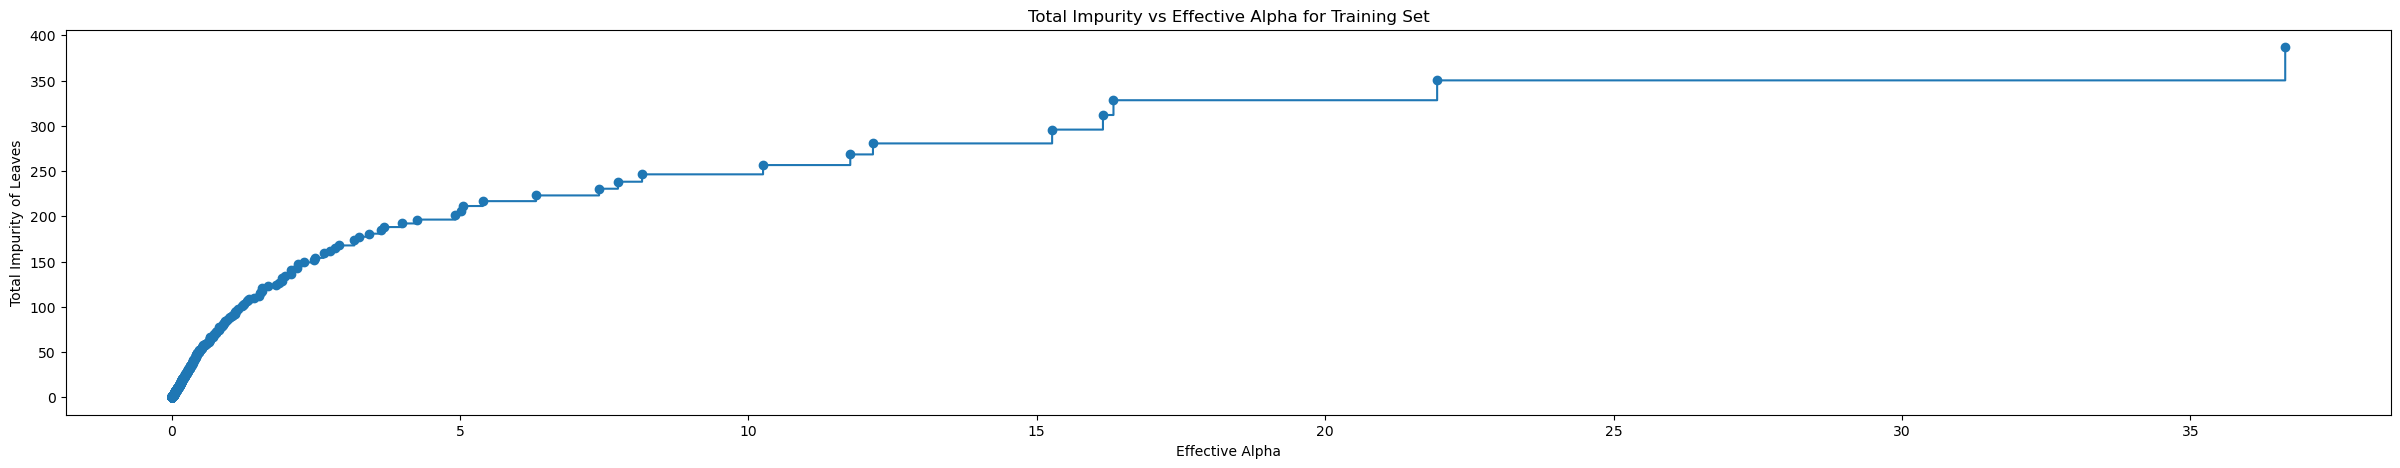

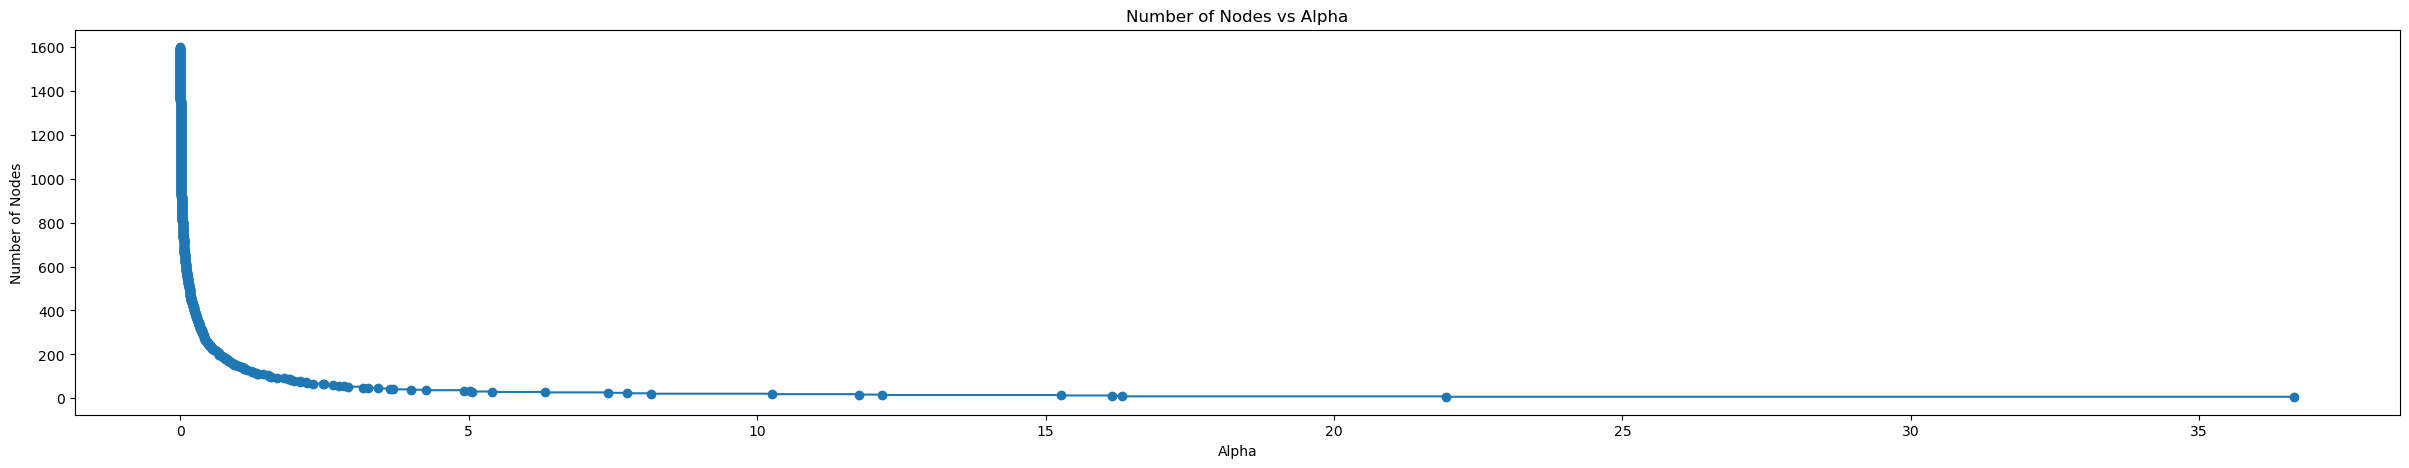

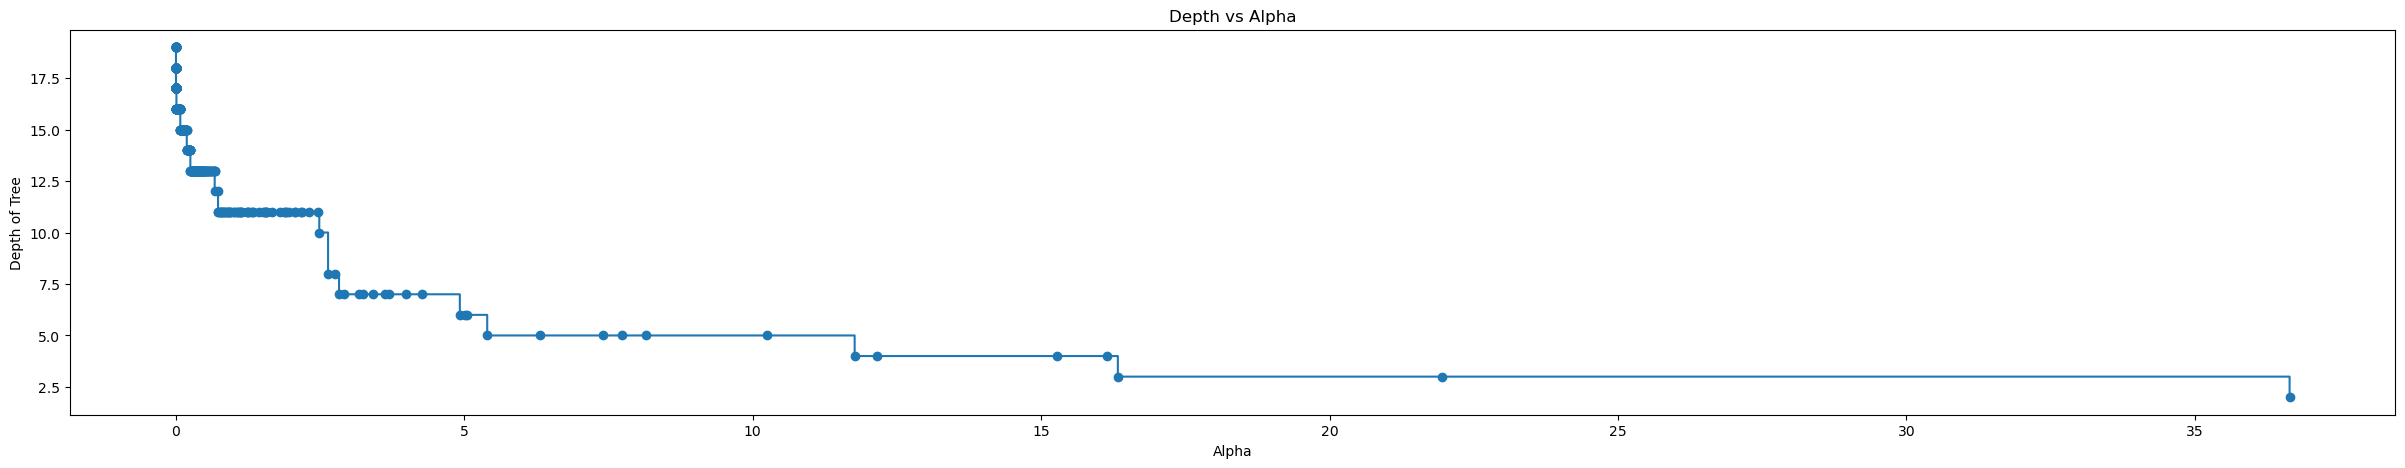

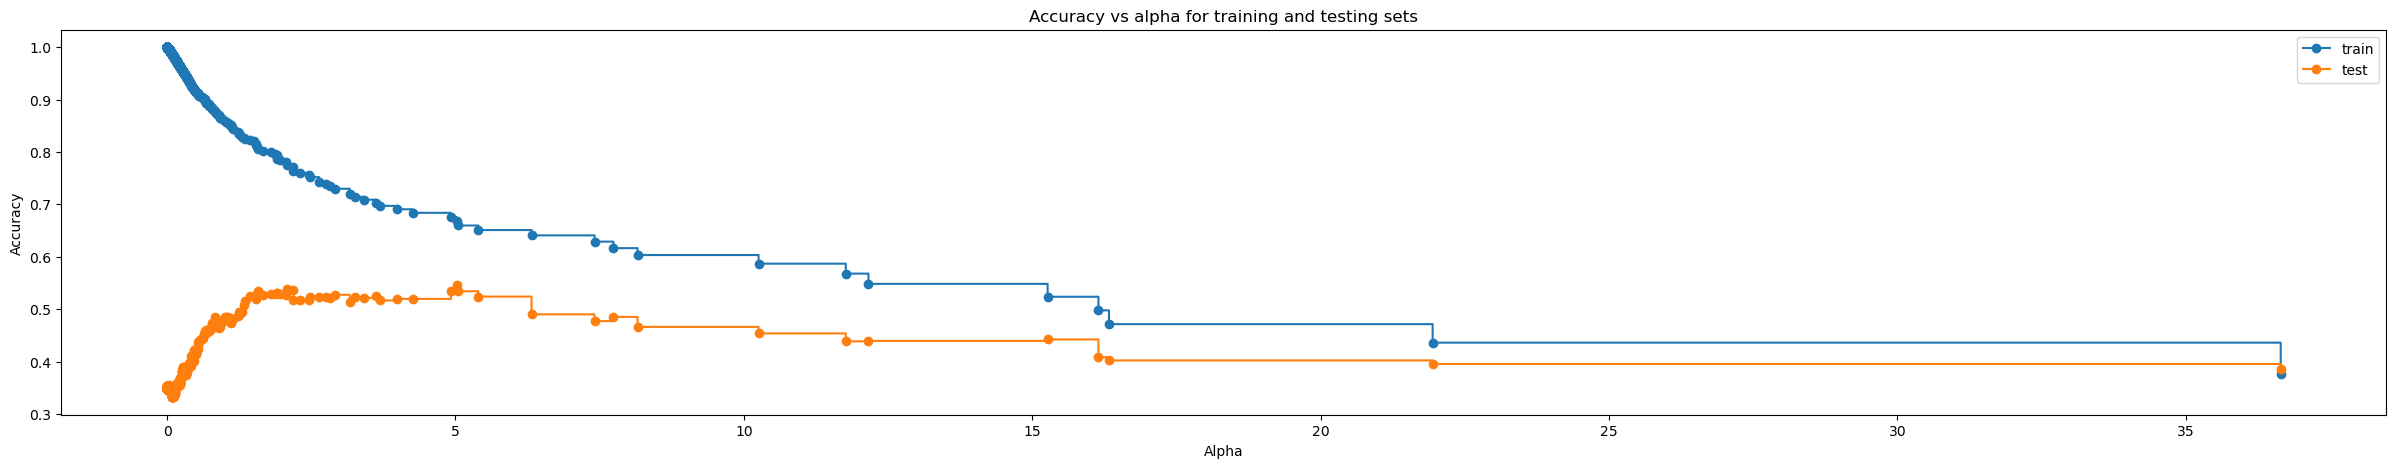

Alpha value corrusponding to the maximum score: 5.0186385086839
Train MSE for Sklearn post-pruned tree: 206.28751114407976
Test MSE for Sklearn post-pruned tree: 240.75111958258913
Sklearn post-pruned tree depth: 6


In [98]:
# Apply post-pruning using Sklearn's cost complexity pruning based on the documentation's example (https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

# This pruning technique is parameterized by the cost complexity parameter, ccp_alpha 
# Greater values of ccp_alpha increase the number of nodes pruned
# Nodes with the smallest effective alpha are pruned first
# 'DecisionTreeClassifier.cost_complexity_pruning_path' returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process
# As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves

clf = DecisionTreeRegressor(random_state=0)                 #random state set to 0 here for deterministic results (features are not randomly permuted at each split)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(30,5))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Effective Alpha for Training Set")

# Train a decision tree using the effective alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Show that the number of nodes and tree depth decreases as alpha increases

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(30,5))
plt.plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Number of Nodes")
plt.title("Number of Nodes vs Alpha")

plt.figure(figsize=(30,5))
plt.plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Depth of Tree")
plt.title("Depth vs Alpha")

# When ccp_alpha is set to 0, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy
# As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better
# Find the alpha corrusponding to the maximum test accuracy

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(30,5))
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

print(f"Alpha value corrusponding to the maximum score: {ccp_alphas[test_scores.index(max(test_scores))]}")

# Use this alpha value to train the regression tree, test it with the test set, and find the mean squared error

sklearn_tree_model = DecisionTreeRegressor(random_state=0, ccp_alpha = ccp_alphas[test_scores.index(max(test_scores))])
sklearn_tree_model.fit(X_train, y_train)

print(f"Train MSE for Sklearn post-pruned tree: {mean_squared_error(y_train, sklearn_tree_model.predict(X_train))}")
print(f"Test MSE for Sklearn post-pruned tree: {mean_squared_error(y_test, sklearn_tree_model.predict(X_test))}")
print(f"Sklearn post-pruned tree depth: {sklearn_tree_model.get_depth()}")

With manual post-pruning, the pruned tree's test MSE slightly decreased and the train MSE slightly increased relative to the fully-grown tree. The impact of post-pruning based on impurities was not very effective due to the small change in the MSEs and the minimal reduction to the tree's complexity (its large depth did not change), causing it to not generalize well enough for the testing data. 

With manual pre-pruning, the test MSEs were greatly improved and the results were all comprable. Of the four methods attempted (min_samples_leaf, min_samples_split, max_depth, and independantly optimized parameters), min_samples_split resulted in the lowest test MSE. Reducing the complexity of the tree using these methods increased the training MSE, but allowed for better estimations when applied to the test data. 

With sklearn's implementation of cost-complexity post-pruning, the test MSE was greatly improved and was comprable to the results of manual pre-pruning. It however, did not perform better than all methods of pre-pruning. Cos

## 3. Comparison with Random Forest and SVR (25 Marks)
Optimize parameters for Decision Trees (DTs), Random Forest, and Support Vector Regression (SVR).
Compare results using sutable metrics.
Discuss the strengths and weaknesses of each method.

In [99]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# (Decision Tree) parameters to optimize
# criterion using mean squared error
# max_depth represents the maximum depth, from Task 2 (Regression Tree), 6 was the best
# min_samples_split represents the sample to split, from Task 2 (Regression Tree), 59 was the best
# min_samples_leaf represents the samples at each leaf node, from Task 2 (Regression Tree), 19 was the best
decision_tree_para = {'criterion': ['squared_error', 'absolute_error'],'max_depth': [None, 3, 6, 9, 12],'min_samples_split': [20, 30, 40, 50, 60, 70, 80],'min_samples_leaf': [5, 10, 15, 20, 25, 30]}

# (Random Forest) parameters to optimize
# n_estimators represents the number of decision trees in the forest
# max_features represents the number of features to consider when looking for the best split
# min_samples_split represents the sample to split, from Task 2 (Regression Tree), 59 was the best
# min_samples_leaf represents the samples at each leaf node, from Task 2 (Regression Tree), 19 was the best
random_forest_para = {'n_estimators': [10, 50, 100, 150],'max_features': [None, 'sqrt', 'log2'],'min_samples_split': [20, 30, 40, 50, 60, 70, 80],'min_samples_leaf': [5, 10, 15, 20, 25, 30]}

# (Support Vector Regression [SVR]) parameters to optimize
# kernel is the kernel type to be used
# C is the regularization strength parameter, smaller C is a smoother decision boundary, larger is a better training data fit
# epsilon is the width parameter for the margin of tolerance, smaller is tighter fit to training data, larger is more tolerance
# gamma is the kernel coefficient, smaller gamma has larger radius of influence and smoother boundary, larger has a more sensitive decision boundary
SVR_para = {'kernel': ['linear', 'poly', 'rbf'],'C': [0.1, 1, 10, 100],'epsilon': [0.001, 0.01, 0.1, 1],'gamma': ['scale', 'auto']}

# use grid search to find the best parameter combinations, it searches exhaustively including using cross-validation
decision_tree_search = GridSearchCV(DecisionTreeRegressor(), decision_tree_para, cv = 5)

# use randomized search to find the best parameter combinations, it searchs a random subset of combinations
# using this for efficiency since random forest is much larger than a single decision tree
random_forest_search = RandomizedSearchCV(RandomForestRegressor(), random_forest_para, n_iter = 100, cv = 5)

# as with decision trees use grid search to find the best parameter combinations, it searches exhaustively including using cross-validation
SVR_search = GridSearchCV(SVR(), SVR_para, cv = 5)

# fit the models to the data set
decision_tree_search.fit(X_train, y_train)
random_forest_search.fit(X_train, y_train)
SVR_search.fit(X_train, y_train)

# get and print the optimized parameters
print("Optimized parameters for Decision Tree  :", decision_tree_search.best_params_)
print("Optimized parameters for Random Forest  :", random_forest_search.best_params_)
print("Optimized parameters for SVR            :", SVR_search.best_params_)

# refit the models with the optimized parameters
decision_tree_opt_model = decision_tree_search.best_estimator_
decision_tree_opt_model.fit(X_train, y_train)

random_forest_opt_model = random_forest_search.best_estimator_
random_forest_opt_model.fit(X_train, y_train)

SVR_opt_model = SVR_search.best_estimator_
SVR_opt_model.fit(X_train, y_train)

# evaluate the three optimized models on test data
decision_tree_score = decision_tree_opt_model.score(X_test, y_test)
random_forest_score = random_forest_opt_model.score(X_test, y_test)
SVR_score = SVR_opt_model.score(X_test, y_test)

# print score to compare results
print("Score for Decision Tree :", decision_tree_score)
print("Score for Random Forest :", random_forest_score)
print("Score for SVR           :", SVR_score)

# to compare with task 2, calcualte MSE for each
decision_tree_pred = decision_tree_opt_model.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)

random_forest_pred = random_forest_opt_model.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)

SVR_pred = SVR_opt_model.predict(X_test)
SVR_mse = mean_squared_error(y_test, SVR_pred)

# print MSE to compare results again
print("Mean Squared Error for Decision Tree :", decision_tree_mse)
print("Mean Squared Error for Random Forest :", random_forest_mse)
print("Mean Squared Error for SVR           :", SVR_mse)

# Discussion of strengths and weaknesses of each method
print("The decision trees runs very quickly and can be perfectly tuned using the grid search algorithm, however, it lacks accuracy due to it being quick and computationally cheap")
print("The random forests runs very slowly as it is doing the decision trees multple times and cannot be perfectly tuned because of its computational cost, due to this the random search algorithm was used to optimize, however, it provides great accuracy")
print("The SVR runs fairly quick and can be perfectly tuned using the grid search algorithm and it also produced the best results, showing that it is a better algorithm than tree search for this dataset")

Optimized parameters for Decision Tree  : {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 30}
Optimized parameters for Random Forest  : {'n_estimators': 50, 'min_samples_split': 30, 'min_samples_leaf': 5, 'max_features': None}
Optimized parameters for SVR            : {'C': 10, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Score for Decision Tree : 0.48527749005722787
Score for Random Forest : 0.6513672372680102
Score for SVR           : 0.6768015801961655
Mean Squared Error for Decision Tree : 272.60449319124996
Mean Squared Error for Random Forest : 184.64095849428847
Mean Squared Error for SVR           : 171.1705622523345
The decision trees runs very quickly and can be perfectly tuned using the grid search algorithm, however, it lacks accuracy due to it being quick and computationally cheap
The random forests runs very slowly as it is doing the decision trees multple times and cannot be perfectly tuned because of its computational co

## 4. Classification Task (10 Marks)
Add a threshold to the label column for a classification task.
Assign classes: 20% lowest yield per hectare as "low" and 80% as "high."
Apply SVM, DTs, and optimize parameters then compare them with suitable classification metrics.

In [100]:
# Threshold/Labeling

thres_low = df['yield'].quantile(0.2)
# thres_high = df['yield'].quantile(0.8)

df['thres_label'] = ['-1' if x <= thres_low else '1' for x in df['yield']]

X = df.drop(columns=['yield', 'thres_label'])  # Features
y = df['thres_label']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### SVM

In [102]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

def print_evaluation_metrics(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluation metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}\n")

# Get default SVC score
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print_evaluation_metrics("Default SVM Classifier", y_test, y_pred_svm)

# Get Best SVC score

# Define the parameter grid to search
# Long
# svm_param_grid = {
#     'C': [np.linspace(0.1, 100, 10)],  
#     'kernel': ['linear', 'rbf', 'poly'], 
#     'gamma': [0.1, 0.01, 0.001]  
# }
# short
svm_param_grid = {
    'C': [0.1,100],  # Regularization parameter
    'kernel': ['linear'],  # Kernel types
    'gamma': [0.1, 0.001]  # Kernel coefficient for 'rbf' and 'poly'
}

svm_model = SVC()

# Perform grid search
svm_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=2, n_jobs=-1, scoring='accuracy')
svm_search.fit(X_train, y_train)

best_params = svm_search.best_params_
print("Best Parameters:", best_params)

best_model_svm = svm_search.best_estimator_
y_pred_best_svm = best_model_svm.predict(X_test)
print_evaluation_metrics("Best SVM Classifier", y_test, y_pred_best_svm)

Evaluation metrics for Default SVM Classifier:
Accuracy: 0.8033
Precision: 0.6453
Recall: 0.8033
F1-score: 0.7157

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Evaluation metrics for Best SVM Classifier:
Accuracy: 0.8533
Precision: 0.8445
Recall: 0.8533
F1-score: 0.8306



Parameter significance for SVM Classifier:


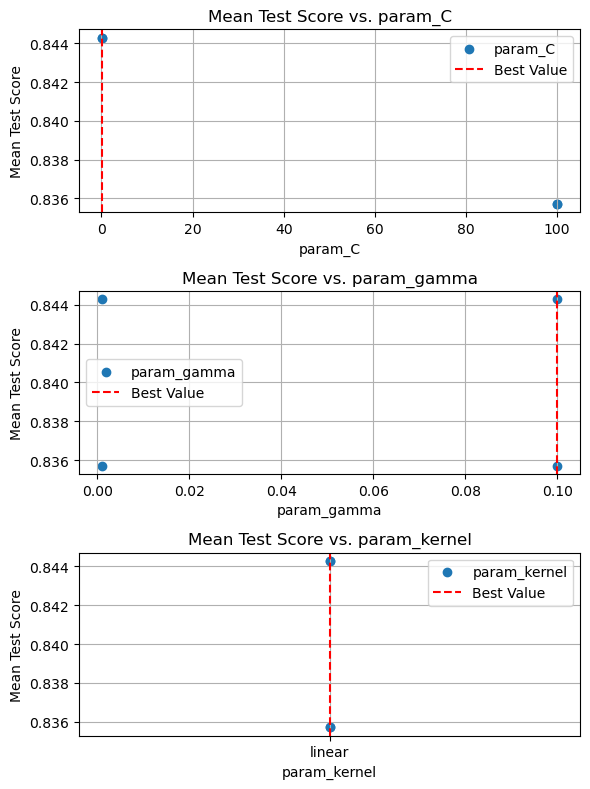

In [103]:
# Plot 

def plot_param_significance(model_name, model_search):
    print(f"Parameter significance for {model_name}:")

    # Convert cv_results_ to DataFrame
    cv_results_df = pd.DataFrame(model_search.cv_results_)

    # param_columns = [col for col in cv_results_df.columns if col.startswith("param_")]
    param_columns = [col for col in cv_results_df.columns if col.startswith("param_")]
    for i, col in enumerate(param_columns):
        cv_results_df[col] = cv_results_df[col].fillna(f"None")

    mean_test_score = cv_results_df["mean_test_score"]

    # Plot the data for each hyperparameter separately
    num_param_columns = len(param_columns)
    fig, axes = plt.subplots(num_param_columns, 1, figsize=(6, 8))

    for i, param_col in enumerate(param_columns):
        ax = axes[i]
        ax.scatter(cv_results_df[param_col], mean_test_score, label=param_col)

        # Highlight the best value
        best_index = cv_results_df["mean_test_score"].idxmax()
        best_value = cv_results_df[param_col][best_index]
        ax.axvline(x=best_value, color='r', linestyle='--', label='Best Value')

        ax.set_xlabel(param_col)
        ax.set_ylabel("Mean Test Score")
        ax.set_title("Mean Test Score vs. " + param_col)
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()



plot_param_significance("SVM Classifier", svm_search)

### DT

Evaluation metrics for Default Decision Tree Classifier:
Accuracy: 0.8033
Precision: 0.8151
Recall: 0.8033
F1-score: 0.8084

Best Parameters for Decision Tree: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Evaluation metrics for Best Decision Tree Classifier:
Accuracy: 0.8200
Precision: 0.8155
Recall: 0.8200
F1-score: 0.8176

Parameter significance for DT Classifier:


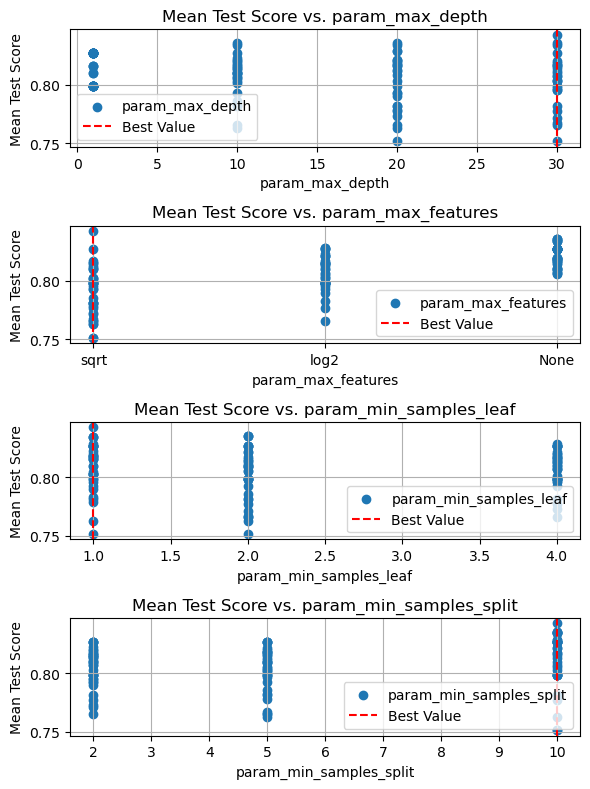

In [104]:
# Initialize and train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier, export_text

# Get default values
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print_evaluation_metrics("Default Decision Tree Classifier", y_test, y_pred_dt)

# Get Best values

# Define the parameter grid to search
dt_param_grid = {
    'max_depth': [1, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],   
    'max_features': ['sqrt', 'log2',None] 
}

dt_model = DecisionTreeClassifier()

# Perform grid search
dt_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=2, n_jobs=-1, scoring='accuracy')
dt_search.fit(X_train, y_train)

best_params_dt = dt_search.best_params_
print("Best Parameters for Decision Tree:", best_params_dt)

best_model_dt = dt_search.best_estimator_
y_pred_best_dt = best_model_dt.predict(X_test)

# Print evaluation metrics for the best model
print_evaluation_metrics("Best Decision Tree Classifier", y_test, y_pred_best_dt)
plot_param_significance("DT Classifier", dt_search) 

# Print tree
# tree_text = export_text(best_model_dt, feature_names=list(X_train.columns))
# print(tree_text)

### Compare SVM and DT

In [105]:
# Evaluate the SVM Classifier
print_evaluation_metrics("SVM Classifier", y_test, y_pred_best_svm)

# Evaluate the DT Classifier
print_evaluation_metrics("Decision Tree Classifier", y_test, y_pred_best_dt)

Evaluation metrics for SVM Classifier:
Accuracy: 0.8533
Precision: 0.8445
Recall: 0.8533
F1-score: 0.8306

Evaluation metrics for Decision Tree Classifier:
Accuracy: 0.8200
Precision: 0.8155
Recall: 0.8200
F1-score: 0.8176



## 5. Regression Tree as a Classifier (20-30 Marks)
Take the best regression tree from question 2.
Evaluate it as a classification problem following question 4 criteria.
Perform threshold analysis ( like ROC curve) to find the optimal threshold.
Compare the tree with optimal threshold with DTs from question 4. When comparing the results with Decision Trees (DTs) from question 4, consider the scenario where the underlying data is originally regression-based, but the task at hand requires a binary classification of 'yes' and 'no.' Discuss the implications of using regression labels directly versus thresholding them for classification purposes. Provide detailed insights into why one approach may be preferred over the other

# Submit a PDF report.
# Include a Google Colab link at the top of the report.
# Ensure accessibility to the Colab link for everyone.
# Follow these steps, keeping the analysis clear and straightforward, to successfully complete SYDE 522 Assignment 2.